<a href="https://colab.research.google.com/github/3217haeseong/Python_study/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

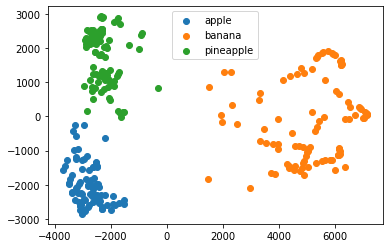

In [ ]:

import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans


lr=LogisticRegression()
km=KMeans(n_clusters=3,random_state=42)

fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

pca=PCA(n_components=0.5)
pca.fit(fruits_2d)

fruits_pca=pca.transform(fruits_2d)
km.fit(fruits_pca)

def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows=int(np.ceil(n/10))
  cols= n if rows <2 else 10

  fig,axs=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

for label in range(0,3):
  data=fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])

plt.legend(['apple','banana','pineapple'])
plt.show()